In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import shap
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import joblib
import streamlit as st


In [2]:
#Read the csv file (the dataset)
df= pd.read_csv('C:/Users/mosel/Documents/PYTHON/machine_learning/Classifying_the_Audio_Genres/0000-1.csv')

In [3]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [5]:
df.dtypes

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [6]:
df.shape

(114000, 21)

1 : Cleaning Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           114000 non-null  object 
 3   album_name        114000 non-null  object 
 4   track_name        114000 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [8]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [9]:
# To find the missing values in the dataset
df.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [10]:
# To check the duplicates in the dataset

df.duplicated().sum()


np.int64(450)

In [11]:
# To remove the duplicate values 

df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

STEP 2 :EDA

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113550 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113550 non-null  object 
 1   artists           113550 non-null  object 
 2   album_name        113550 non-null  object 
 3   track_name        113550 non-null  object 
 4   popularity        113550 non-null  int64  
 5   duration_ms       113550 non-null  int64  
 6   explicit          113550 non-null  bool   
 7   danceability      113550 non-null  float64
 8   energy            113550 non-null  float64
 9   key               113550 non-null  int64  
 10  loudness          113550 non-null  float64
 11  mode              113550 non-null  int64  
 12  speechiness       113550 non-null  float64
 13  acousticness      113550 non-null  float64
 14  instrumentalness  113550 non-null  float64
 15  liveness          113550 non-null  float64
 16  valence           113550 

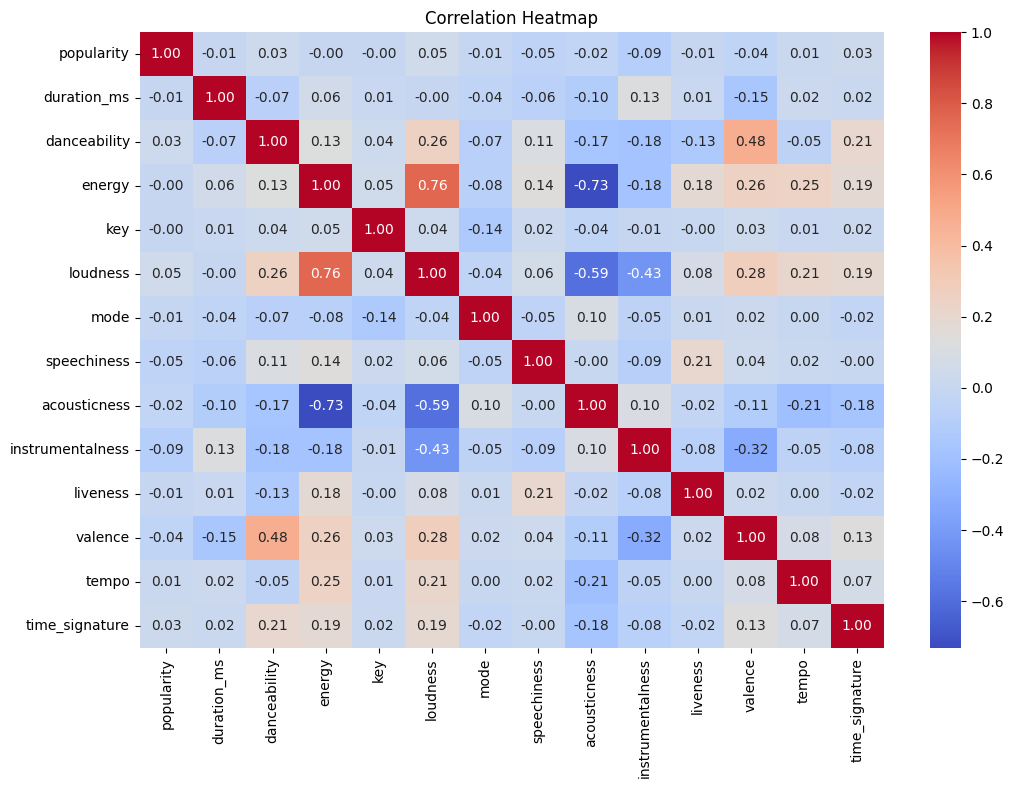

In [13]:
# correlation heatmap 

number_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_heatmap = df[number_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_heatmap, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

The correlation matrix heatmap shows the relationships between different audio features of a song. Here are some major interpretations:

Strong negative correlation between energy and acousticness: Songs with high energy tend to have low acousticness, and vice versa. This is expected, as acousticness is a measure of how acoustic a song sounds, while energy is a measure of how intense it is.

Strong positive correlation between loudness and energy: The correlation heatmap shows that loudness and energy have a positive correlation of 0.68. This means that songs with higher energy levels tend to be louder, and vice versa.

In [14]:
# To check the unique values in the 'track_genre' column

df['track_genre'].unique()



array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [15]:
# Mapping 'track_genre' to music_category and create a new column 'music_category'

genre_map = {
    "pop": [
        "alternative", "anime", "british", "cantopop", "chill", "disco", "disney",
        "electronic", "french", "happy", "indie-pop", "indie", "j-idol", "j-pop",
        "k-pop", "mandopop", "mpb", "new-age", "opera", "party", "piano", "pop-film",
        "pop", "power-pop", "romance", "show-tunes", "singer-songwriter", "spanish",
        "synth-pop", "swedish", "songwriter"
    ],
    "rap": [
        "hip-hop"
    ],
    "rock": [
        "alt-rock", "black-metal", "blues", "death-metal", "emo", "folk", "goth",
        "grindcore", "grunge", "hard-rock", "hardcore", "heavy-metal", "industrial",
        "j-rock", "jazz", "metal", "metalcore", "psych-rock", "punk-rock", "punk",
        "rock-n-roll", "rock", "rockabilly"
    ],
    "latin": [
        "afrobeat", "brazil", "dancehall", "forro", "latin", "latino", "pagode",
        "salsa", "samba", "sertanejo", "tango", "reggaeton", "reggae"
    ],
    "r&b": [
        "r-n-b", "gospel", "soul"
    ],
    "edm": [
        "breakbeat", "chicago-house", "club", "dance", "deep-house", "detroit-techno",
        "drum-and-bass", "dub", "dubstep", "edm", "electro", "garage", "hardstyle",
        "house", "idm", "j-dance", "minimal-techno", "progressive-house", "techno",
        "trance", "trip-hop"
    ],
    "others": [
        "acoustic", "children", "comedy", "german", "honky-tonk", "indian", "iranian",
        "kids", "malay", "sleep", "study", "turkish", "world-music", "groove",
        "guitar", "sad"
    ]
}
 
    

# Create reverse mapping: subgenre → main genre
subgenre_to_main = {sub: main for main, subs in genre_map.items() for sub in subs}

# Map to music_category
df['music_category'] = df['track_genre'].map(subgenre_to_main)


In [16]:
df['music_category'].value_counts()

music_category
pop       30855
rock      22974
edm       20919
others    15908
latin     12975
r&b        2998
rap         991
Name: count, dtype: int64

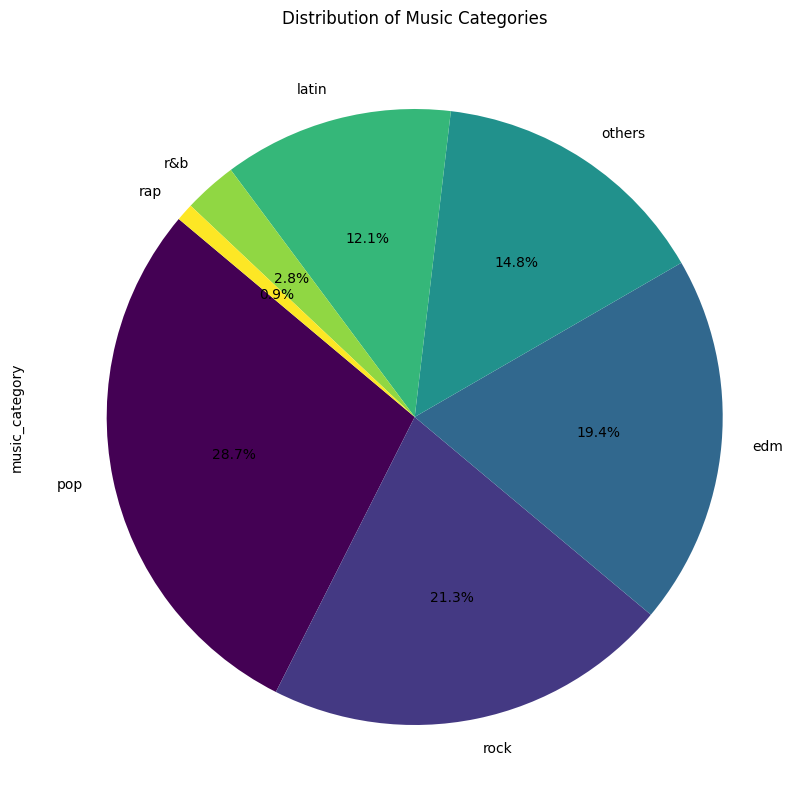

In [17]:
#pie chart for music_category

plt.figure(figsize=(10,10))
df['music_category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, cmap='viridis')
plt.title('Distribution of Music Categories')
plt.ylabel('music_category')
plt.show()

Dominant Genres: rock, Pop, and EDM are the most prominent genres in the playlists, suggesting that these styles have substantial appeal among users.

Significant Presence: Latin, rap, r & b genres also have shares.


<Figure size 1000x500 with 0 Axes>

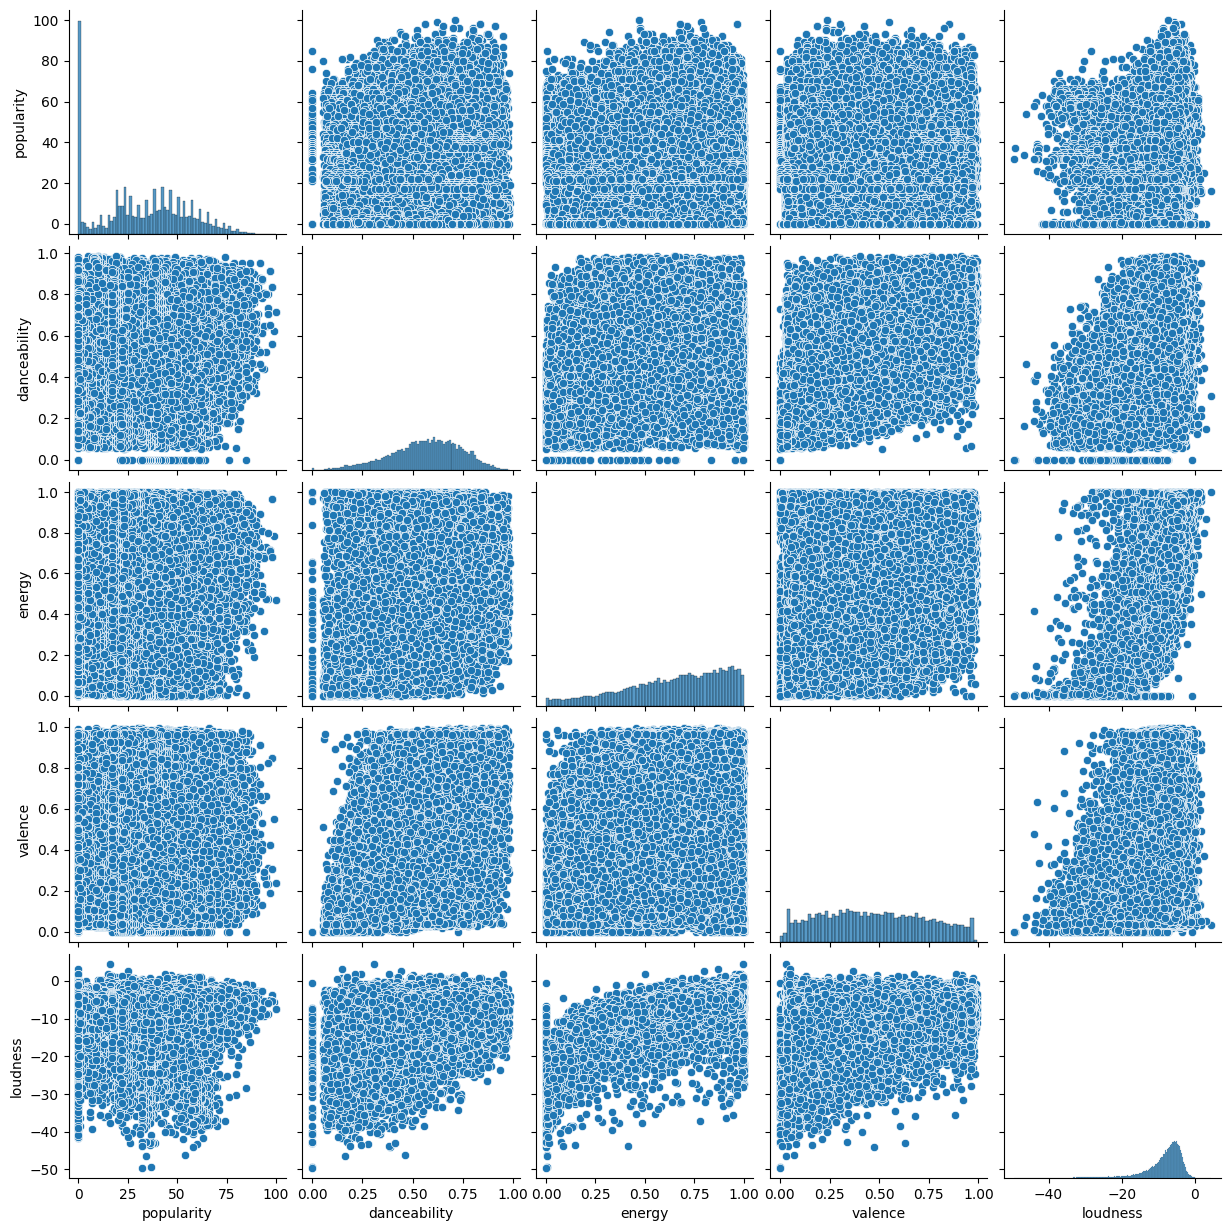

In [18]:
#Pair plot of selected features 


plt.figure(figsize=(10,5))

feature_relationship= df[['popularity','danceability','energy','valence','loudness']]

sns.pairplot(feature_relationship)

plt.show()

Popularity vs Danceability: Weak or no clear correlation.

Popularity vs Energy: Slight positive trend—more energetic tracks might be a bit more popular.

Danceability vs Valence: Positive trend—happier songs are more danceable.

Energy vs Loudness: Clear positive correlation—as expected, louder tracks tend to be more energetic.

Valence vs Loudness: Mild positive correlation—happier tracks can be slightly louder.

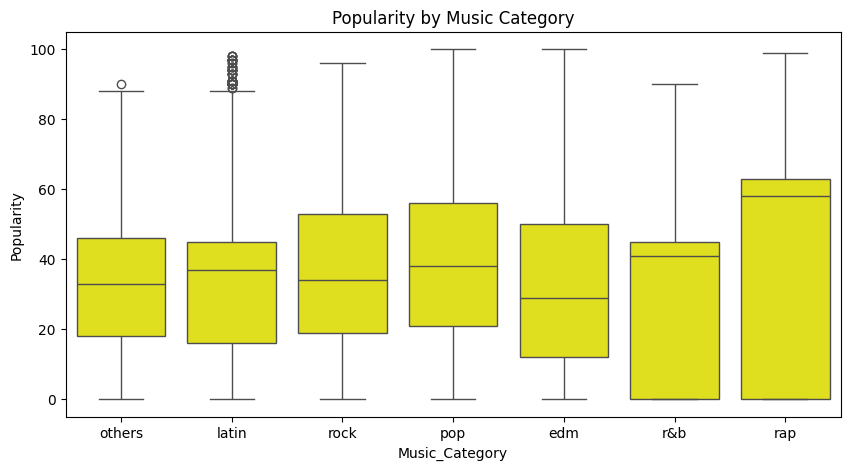

In [19]:
# Box plot of music_category by popularity

plt.figure(figsize=(10,5))
sns.boxplot(x='music_category', y='popularity', data=df, color='yellow')
plt.title('Popularity by Music Category')
plt.xlabel('Music_Category')
plt.ylabel('Popularity')
plt.show()

Rap music have the highest popularity, followed by r&b, latin,pop.

Rock and EDM genres have wider range of track popularity with some tracks very popular and others less .

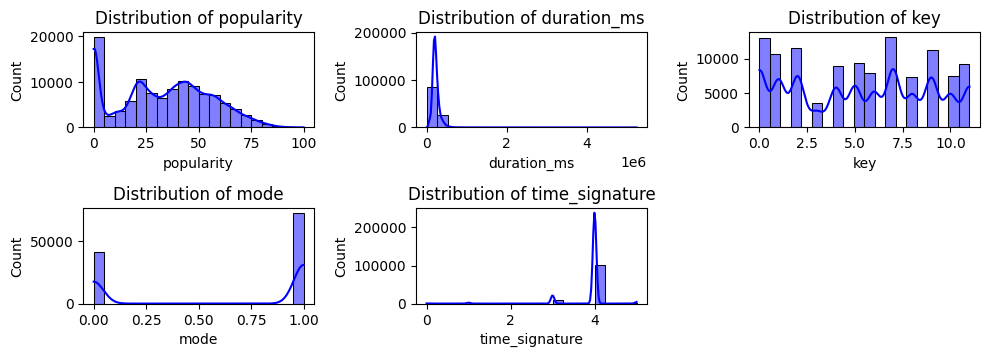

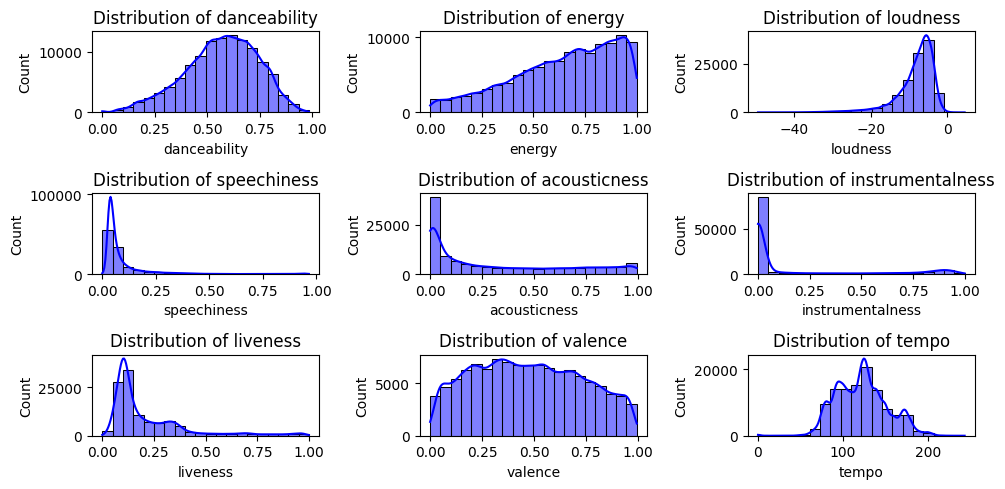

In [20]:
# Distribution of features - Histogram of numeric columns


number_columns2 = df.select_dtypes(include=['int64']).columns
plt.figure(figsize=(10, 5))
for i , j in enumerate(number_columns2,1):
    plt.subplot(3, 3, i)
    sns.histplot(df[j], kde=True,bins=20, color='blue')
    plt.title(f'Distribution of {j}')
plt.tight_layout()
plt.show()

number_columns3 = df.select_dtypes(include=['float64']).columns
plt.figure(figsize=(10, 5))
for i , j in enumerate(number_columns3,1):
    plt.subplot(3, 3, i)
    sns.histplot(df[j], kde=True,bins=20,color='blue')
    plt.title(f'Distribution of {j}')
plt.tight_layout()
plt.show()


    

Popularity: This distribution is skewed to the right, with more tracks having a lower popularity score. There are a smaller number of tracks with a very high popularity.

Duration_ms: The distribution of track durations is skewed to the right. There are more tracks with a shorter duration than tracks with a longer duration.

key : The distribution of key tonal center or scale are mixed.

mode: The distribution provides more detail about the character or mood of the scale being used. Mode is high and also low in some areas.

Time_signature: A time signature is a notational convention used in written music to specify how the rhythm is organized — specifically, how many beats are in each measure and what kind of note gets one beat. Here 4 have higher node.

Danceability: The distribution is slightly skewed to the right, with more tracks having a higher danceability score. This suggests most music in the dataset leans towards being more suitable for dancing.

Energy: Similar to danceability, energy is also skewed to the right, indicating there are more energetic tracks than less energetic ones.

Loudness: The loudness distribution appears more symmetrical, with an equal number of tracks having a higher or lower loudness level.

Valence: This distribution is also somewhat symmetrical, with a slight bias towards more positive valence scores. There are still a good amount of tracks with a negative valence, though.

Tempo: The tempo distribution is skewed to the right, with a concentration of tracks having a lower tempo. There are still some tracks with a higher tempo, but they are less frequent.


Popularity: This distribution is skewed to the right, with more tracks having a lower popularity score. There are a smaller number of tracks with a very high popularity.

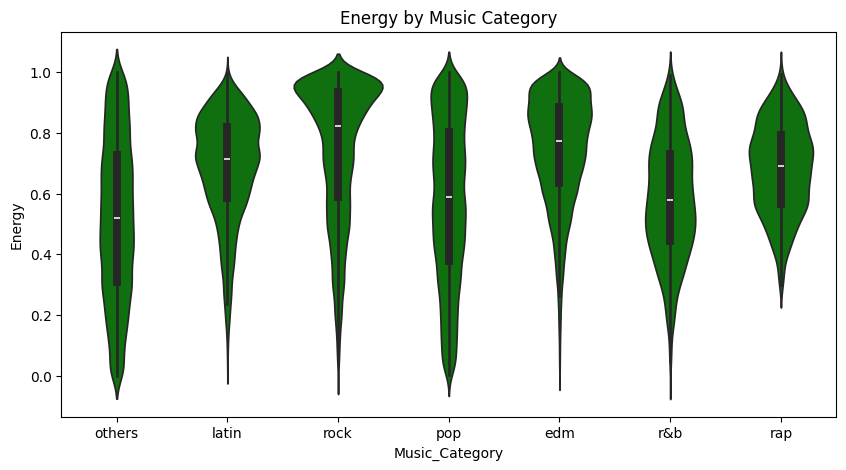

In [21]:
#violin plot of music_category by energy

plt.figure(figsize=(10,5))
sns.violinplot(x='music_category', y='energy', data=df, color='green')
plt.title('Energy by Music Category')
plt.xlabel('Music_Category')
plt.ylabel('Energy')
plt.show()

Rock and edm tend to, be more energetic.

R&b  tend to be least energetic.

STEP 3 : Train and Test the Machine Learning Algorithms.

1.Popularity Prediction:


a.RandomForestRegressor

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# Label encode categorical columns

categorical_columns = df.select_dtypes(include=['object']).columns

le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])


# Define the feature set by removing the irrelevant columns

X = df.drop(columns=['danceability','energy','loudness','valence','duration_ms','music_category'])


# Define the target variable

y = df['popularity']


# Standardize the feature set

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Train-test split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

# Train Random Forest classifier

Randomforestmodel = RandomForestRegressor(n_estimators=500, max_depth=20,random_state=42)

Randomforestmodel.fit(X_train, y_train)

# Predict on test set

y_pred = Randomforestmodel.predict(X_test)

# Evaluate performance

r2_rf = r2_score(y_test, y_pred)
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)

print(f"RandomForestRegressor Model Performance:")
print (f"R^2 Score: {r2_rf}")
print(f"Mean Absolute Error: {mae_rf}")
print(f"Mean Squared Error: {mse_rf}")
print(f"Root Mean Squared Error: {rmse_rf}")




RandomForestRegressor Model Performance:
R^2 Score: 0.9999998644364678
Mean Absolute Error: 0.0001275085397096504
Mean Squared Error: 6.787521349274178e-05
Root Mean Squared Error: 0.008238641483445058


b.XGBRegressor

In [23]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# Label encode categorical columns

categorical_columns = df.select_dtypes(include=['object']).columns

le = LabelEncoder()

for col in categorical_columns:

    df[col] = le.fit_transform(df[col])

# Define the feature set by removing the irrelevant columns

X = df.drop(columns=['danceability','energy','loudness','valence','duration_ms','music_category'])

# Define the target variable

y = df['popularity']


# Standardize the feature set

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Train-test split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

# Train XGBRegressor

XGBoostmodel = XGBRegressor(n_estimators=500, max_depth=20,random_state=42)

XGBoostmodel.fit(X_train, y_train)

# Predict on test set

y_pred = XGBoostmodel.predict(X_test)

# Evaluate performance

r2_xgb = r2_score(y_test, y_pred)
mae_xgb = mean_absolute_error(y_test, y_pred)
mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_rf)

print(f"XGBoostRegressor Model Performance:")
print (f"R^2 Score: {r2_xgb}")
print(f"Mean Absolute Error: {mae_xgb}")
print(f"Mean Squared Error: {mse_xgb}")
print(f"Root Mean Squared Error: {rmse_xgb}")

XGBoostRegressor Model Performance:
R^2 Score: 1.0
Mean Absolute Error: 7.500319043174386e-05
Mean Squared Error: 1.446425994799938e-05
Root Mean Squared Error: 0.008238641483445058


2.Genre Classification:

a.RandomForestClassifer


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# Label encode categorical columns

categorical_columns = df.select_dtypes(include=['object']).columns

le = LabelEncoder()

for col in categorical_columns:

    df[col] = le.fit_transform(df[col])

# Define the feature set by removing the irrelevant columns

X = df.drop(columns=['popularity','danceability','energy','loudness','valence','duration_ms'])

# Define the target variable

y = df['music_category']


# Standardize the feature set

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Train-test split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

# Train Random Forest classifier

Randomforestmodelgener = RandomForestClassifier(n_estimators=500, max_depth=20,random_state=42)

Randomforestmodelgener.fit(X_train, y_train)

# Predict on test set

y_pred = Randomforestmodelgener.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



Accuracy: 0.9999199402220325

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6845
           1       1.00      1.00      1.00      4282
           2       1.00      1.00      1.00      5165
           3       1.00      1.00      1.00     10189
           4       1.00      1.00      1.00       963
           5       1.00      1.00      1.00       328
           6       1.00      1.00      1.00      7720
           7       1.00      1.00      1.00      1980

    accuracy                           1.00     37472
   macro avg       1.00      1.00      1.00     37472
weighted avg       1.00      1.00      1.00     37472



b.XGBClassifier

In [25]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# Label encode categorical columns

categorical_columns = df.select_dtypes(include=['object']).columns

le = LabelEncoder()

for col in categorical_columns:

    df[col] = le.fit_transform(df[col])

# Define the feature set by removing the irrelevant columns

X = df.drop(columns=['popularity','danceability','energy','loudness','valence','duration_ms'])

# Define the target variable

y = df['music_category']


# Standardize the feature set

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Train-test split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

# Train XGBClassifier

XGBClassifiermodelgener = XGBClassifier(n_estimators=500, max_depth=20,random_state=42)

XGBClassifiermodelgener.fit(X_train, y_train)

# Predict on test set

y_pred = XGBClassifiermodelgener.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6845
           1       1.00      1.00      1.00      4282
           2       1.00      1.00      1.00      5165
           3       1.00      1.00      1.00     10189
           4       1.00      1.00      1.00       963
           5       1.00      1.00      1.00       328
           6       1.00      1.00      1.00      7720
           7       1.00      1.00      1.00      1980

    accuracy                           1.00     37472
   macro avg       1.00      1.00      1.00     37472
weighted avg       1.00      1.00      1.00     37472



3.Feature Importance Analysis:

SHAP output shape: (37472, 16, 8)
Feature importance for GENRE classification (class 0):


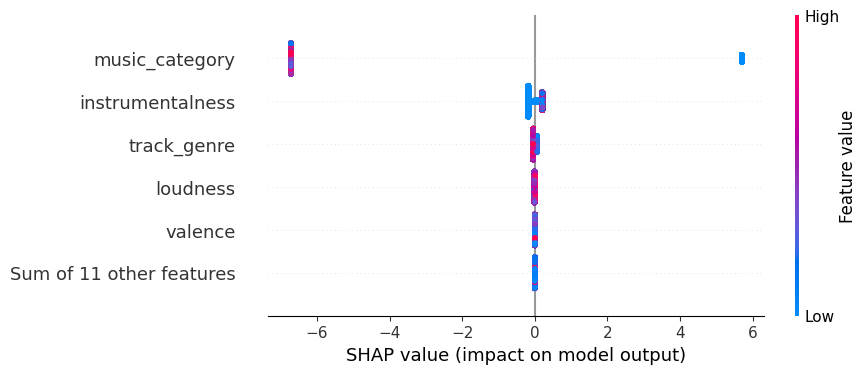

SHAP output shape: (37472, 16)
Feature importance for POPULARITY prediction:


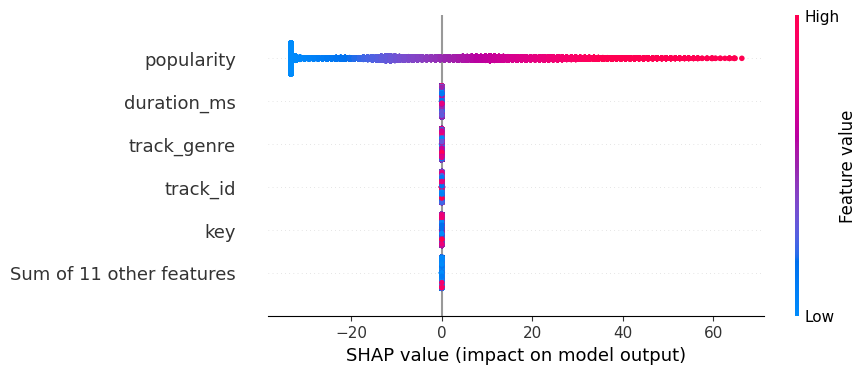

In [26]:
import shap


# Make sure you use correct target variable names (you had some mismatches before)
X = df.drop(columns=['danceability', 'tempo', 'acousticness', 'energy', 'artists'])
yg_genre = df['music_category']
yp_popularity = df['popularity']

# Train-test splits
from sklearn.model_selection import train_test_split
X_train_g, X_test_g, yg_train_g, yg_test_g = train_test_split(X, yg_genre, test_size=0.33, random_state=42)
X_train_p, X_test_p, yp_train_p, yp_test_p = train_test_split(X, yp_popularity, test_size=0.33, random_state=42)

# Model training
from xgboost import XGBClassifier, XGBRegressor
model_genre = XGBClassifier(n_estimators=500, max_depth=20, random_state=42)
model_popularity = XGBRegressor(n_estimators=500, max_depth=20, random_state=42)

model_genre.fit(X_train_g, yg_train_g)
model_popularity.fit(X_train_p, yp_train_p)

# SHAP explanation
import shap
explainer_genre = shap.Explainer(model_genre)
shap_values_genre = explainer_genre(X_test_g)  # Multiclass → list of explanations

explainer_popularity = shap.Explainer(model_popularity)
shap_values_popularity = explainer_popularity(X_test_p)  # Regression → single output

# Show available outputs (classes)
print("SHAP output shape:", shap_values_genre.values.shape)

# Shape: (n_samples, n_features, n_classes)

# Pick one class to visualize — for example, class 0
class_index = 0  # You can change this

# Create new SHAP object for class 0
shap_values_genre_class0 = shap.Explanation(
    values=shap_values_genre.values[:, :, class_index],
    base_values=shap_values_genre.base_values[:, class_index],
    data=shap_values_genre.data,
    feature_names=shap_values_genre.feature_names
)

# Plot SHAP beeswarm for the selected class
print(f"Feature importance for GENRE classification (class {class_index}):")
shap.plots.beeswarm(shap_values_genre_class0, max_display=6)

# Show available outputs (classes)
print("SHAP output shape:",shap_values_popularity.values.shape)
# This works as-is for regression
print("Feature importance for POPULARITY prediction:")
shap.plots.beeswarm(shap_values_popularity, max_display=6)

--Feature importance for GENRE classification:--

*music_category:

Largest impact (range: ~–6 to +6 SHAP).

Low values (blue) tend to reduce popularity predictions.

High values (red) tend to increase them → very influential feature.

*instrumentalness:

Mostly has negative SHAP values → higher instrumentalness may lower predicted popularity.

Red dots (high values) are mostly to the left.

*track_genre:

More subtle effect but still meaningful.

Red and blue dots are more mixed — impact likely depends on genre type.

*loudness:

Generally small effects.

High loudness (red) might slightly boost or lower popularity depending on other features.

*valence:

Low to moderate impact.

High valence (happier-sounding music) seems to have a slightly positive influence.

*Sum of 11 other features:

Represents features that had lower overall impact individually.



--Important keys :--

music_category is the most dominant predictor for popularity in your model.

High instrumentalness likely hurts popularity.

SHAP helps you see not just which features matter, but how and in what direction they affect the predictions.

The color gradient is crucial — it tells you what value range of a feature is driving the prediction.





--Feature importance for POPULARITY prediction:--

*popularity:

Strongest influence on genre prediction.

High popularity (red dots) strongly increase SHAP value, indicating that popular songs are more likely to belong to a certain genre.

Low popularity (blue) decreases the likelihood.

*duration_ms (track duration):

Has smaller but still noticeable impact.

Some long tracks (red) slightly push predictions positively or negatively depending on the class.

*track_genre:

Could be a preliminary or broader genre label used as a feature.

Minor but possibly relevant impact — interpretation depends on how it's defined in your dataset.

*track_id:

Track IDs shouldn't have predictive power.

If this feature is important, it's likely because it's leaking information (e.g., encoded order or structure).

⚠️ Recommendation: Consider dropping or anonymizing track_id.




--Important keys:--

*Most important predictor of genre: popularity

*Possible data leakage risk: track_id — shouldn't be meaningful unless it encodes extra info

*Moderately useful: duration_ms, track_genre, key



4.Clustering Analysis:

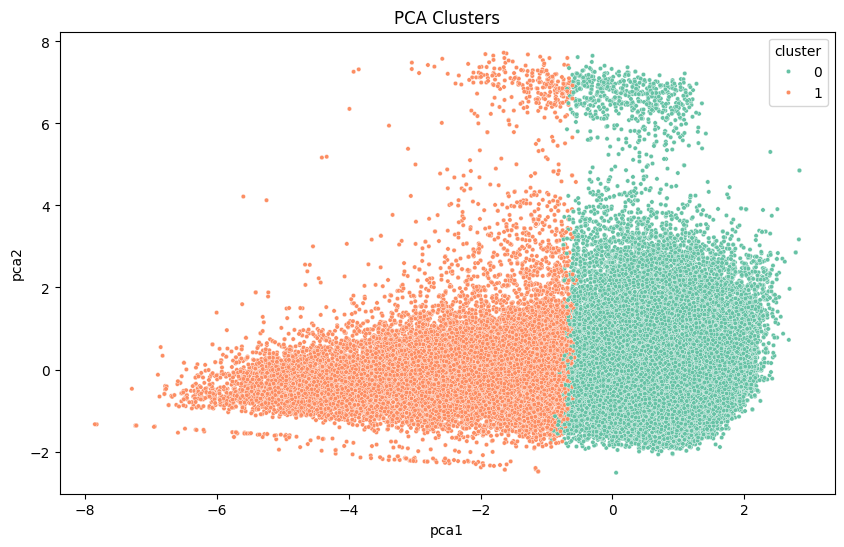

In [27]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
# Select relevant features
#feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness','valence', 'tempo']#'liveness'
feature_cols = ['danceability', 'energy', 'loudness', 'speechiness','acousticness']
#feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness','tempo']
X = df[feature_cols]

# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95,random_state=42)
X_pca = pca.fit_transform(X_scaled)
df['pca1'], df['pca2'] = X_pca[:, 0], X_pca[:, 1]


# Fit KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)



plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2', s=10)
plt.title('PCA Clusters')
plt.show()


🔍 What the Plot Shows
1. Two Clearly Separated Clusters
The data is split into two main regions:

Left side (pca1 < 0): Mostly Cluster 1 (orange)

Right side (pca1 > 0): Mostly Cluster 0 (green)

2. Linear Boundary
There is a relatively sharp separation near pca1 = 0, suggesting that the clustering algorithm (e.g. KMeans) separated the data primarily along the first principal component.

This often means that one dominant feature combination (maybe energy + valence + danceability) is responsible for the division.

3. Cluster Shapes
Cluster 0 (green) appears denser and more uniform.

Cluster 1 (orange) is wider and more spread out, suggesting more variability in its feature set.

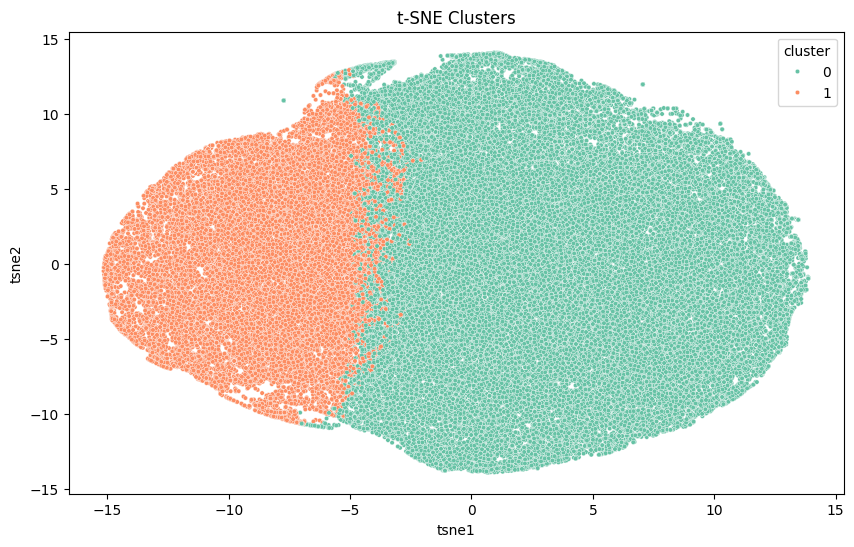

In [28]:
tsne = TSNE(n_components=2, 
            perplexity=30, 
            random_state=42,
            learning_rate='auto',
            init='pca',
            max_iter=300,         # default is 1000
            method='barnes_hut',  # only method for n<~100k
            )

X_tsne = tsne.fit_transform(X_scaled)
df['tsne1'], df['tsne2'] = X_tsne[:, 0], X_tsne[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tsne1', y='tsne2', hue='cluster', palette='Set2', s=10)
#sns.scatterplot(data=df, x=X_tsne[:, 0], y=X_tsne[:, 1], hue='cluster', palette='Set2', s=10)
plt.title('t-SNE Clusters')
plt.show()


🔍 What is This Plot?

Type of Plot: 2D t-SNE (t-distributed Stochastic Neighbor Embedding)

Axes: tsne1 and tsne2 are abstract dimensions (not actual features) used to visualize high-dimensional data in 2D.

Points: Each point represents a track, reduced from many features (e.g., danceability, energy, valence, etc.).

Coloring: Points are colored by cluster labels (e.g., from KMeans )

🟠 Cluster 0

🟢 Cluster 1

In [29]:
# Count genres in each cluster
genre_distribution = df.groupby('cluster')['track_genre'].value_counts(normalize=True).unstack().fillna(0)#['track_genre']

# Display top genres per cluster
for i in range(2):
    print(f"\nCluster {i} top track_genre:")
    print(genre_distribution.loc[i].sort_values(ascending=False).head(5))


score = silhouette_score(X_pca, df['cluster'])
print(f"Silhouette Score: {score:.2f}")


Cluster 0 top track_genre:
track_genre
46     0.012078
49     0.012078
110    0.012078
53     0.012066
83     0.012066
Name: 0, dtype: float64

Cluster 1 top track_genre:
track_genre
108    0.030594
101    0.029592
75     0.029203
16     0.028945
4      0.028621
Name: 1, dtype: float64
Silhouette Score: 0.40


What is the Silhouette Score?

The Silhouette Score measures how well your data has been clustered. It answers:

Are points close to their own cluster (cohesion)?

Are points far from other clusters (separation)?

Formula:

For each point:

a = average distance to other points in the same cluster

b = average distance to points in the nearest different cluster

Silhouette = (b - a) / max(a, b)

Interpretation:

Silhouette Score       Interpretation

*  greater than 0.70   Excellent separation between clusters

* 0.50 – 0.70	       Good separation

* 0.25 – 0.50	       Weak to moderate structure

* < 0.25	           Poor structure 

For complex data like audio (which is high-dimensional and noisy), 0.40 can be acceptable — especially if:​

You're using unsupervised clustering (e.g., K-Means or DBSCAN).​

The number of genres is large or some genres sound similar (e.g., classical vs. instrumental pop)


5.Recommendation system

Load & clean data, removing rows with missing music_category.

Label encode music_category so it's usable in modeling.

Select key audio features and add the encoded category.

Standardize numerical features for balanced contribution.

Apply PCA to reduce dimensionality and capture core patterns.

Train a KNN model using cosine similarity on PCA features.

Create a recommendation function that returns similar tracks.

Build an evaluation function to measure precision & recall.

Evaluate using random samples — high precision (0.92) and recall (0.918).

The system successfully recommends similar songs by audio & category.

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

# --- Preprocessing ---
# Drop rows with missing categories
df = df.dropna(subset=['music_category']).reset_index(drop=True)

# Encode 'music_category' numerically (label encoding)
le = LabelEncoder()
df['music_category_encoded'] = le.fit_transform(df['music_category'])

# Define feature columns
numerical_cols = ['danceability', 'energy', 'loudness', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
feature_cols = numerical_cols + ['music_category_encoded']

# Create feature dataframe
features = df[feature_cols].copy()

# --- Scale numerical features ---
scaler = StandardScaler()
features[numerical_cols] = scaler.fit_transform(features[numerical_cols])

# --- Dimensionality Reduction ---
pca = PCA(n_components=10)  # Reduce to 10 dimensions to avoid curse of dimensionality
features_pca = pca.fit_transform(features)

# --- Fit Nearest Neighbors model ---
nn_model = NearestNeighbors(n_neighbors=6, metric='cosine')  # 6 to include the track itself
nn_model.fit(features_pca)

# --- Recommendation Function ---
def recommend_tracks(index, n=5):
    distances, indices = nn_model.kneighbors([features_pca[index]], n_neighbors=n+1)
    neighbor_indices = indices.flatten()[1:]  # exclude self
    recommendations = df.iloc[neighbor_indices][['track_name', 'artists', 'music_category', 'track_genre', 'duration_ms']]
    return recommendations, neighbor_indices

# --- Evaluation Function (Improved Recall Calculation) ---
def evaluate_recommender(sample_size=100, n_recommendations=5):
    precision_list = []
    recall_list = []

    sampled_indices = np.random.choice(len(df), sample_size, replace=False)

    for idx in sampled_indices:
        true_category = df.iloc[idx]['music_category']
        recommendations, _ = recommend_tracks(idx, n=n_recommendations)

        # Count how many recommendations have the same category
        relevant = (recommendations['music_category'] == true_category)
        relevant_count = np.sum(relevant)

        # Precision = Relevant in top-N / N
        precision = relevant_count / n_recommendations

        # Recall = Relevant in top-N / Total in dataset (clipped to max N)
        total_relevant = np.sum(df['music_category'] == true_category)
        recall = relevant_count / min(total_relevant, n_recommendations)

        precision_list.append(precision)
        recall_list.append(recall)

    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    return avg_precision, avg_recall

# --- Run Evaluation ---
precision, recall = evaluate_recommender(sample_size=200, n_recommendations=5)
print("Recommendation system:")
print(f"Average Precision: {precision:.2f}")
print(f"Average Recall: {recall:.4f}")

Recommendation system:
Average Precision: 0.90
Average Recall: 0.9000


6.Trend analysis

🚫 Why we Can’t Do Trend Analysis Now

Trend analysis answers questions like:

“How has tempo changed over the years?”

If the dataset has no time or order, then:

There’s no way to sort the data chronologically.

we can’t calculate changes over time.

Any "trend" would be meaningless or misleading.



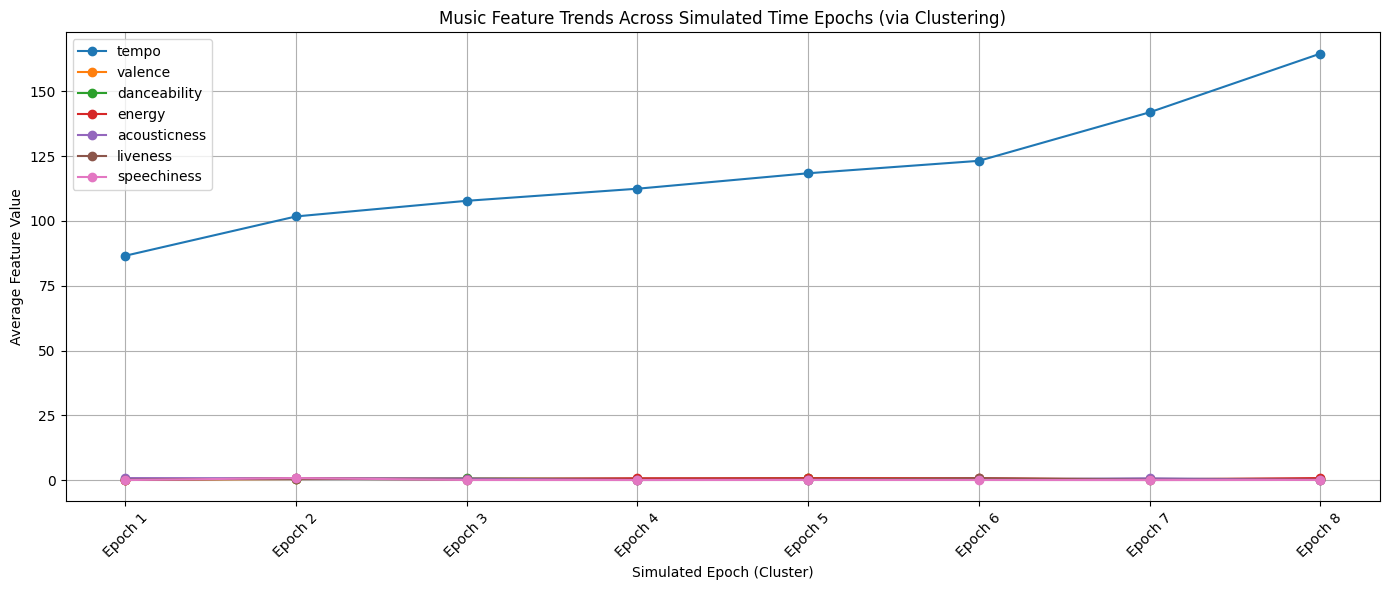

In [31]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Select relevant features ---
features = ['tempo', 'valence', 'danceability', 'energy', 'acousticness', 'liveness', 'speechiness']
X = df[features].copy()

# --- Step 2: Standardize the data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 3: Apply KMeans Clustering ---
k = 8  # Number of clusters = number of "simulated epochs"
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# --- Step 4: Analyze each cluster ---
cluster_summary = df.groupby('cluster')[features].mean().reset_index()

# Optional: Sort clusters by average tempo or energy to simulate temporal flow
cluster_summary = cluster_summary.sort_values(by='tempo').reset_index(drop=True)
cluster_summary['epoch'] = [f'Epoch {i+1}' for i in range(k)]

# --- Step 5: Visualize feature trends across clusters ---
plt.figure(figsize=(14, 6))
for feature in features:
    plt.plot(cluster_summary['epoch'], cluster_summary[feature], marker='o', label=feature)

plt.title('Music Feature Trends Across Simulated Time Epochs (via Clustering)')
plt.xlabel('Simulated Epoch (Cluster)')
plt.ylabel('Average Feature Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph emphasizes that tempo is the most dynamic and increasing feature across simulated epochs.

Other musical features are relatively stable and do not show meaningful trends in this analysis.

This suggests that tempo may be a key factor in defining or distinguishing the clusters over time in the simulated music data.



In [32]:
df.head()


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,tempo,time_signature,track_genre,music_category,pca1,pca2,cluster,tsne1,tsne2,music_category_encoded
0,62846,10357,8100,11741,73,230666,False,0.676,0.4610,1,...,87.917,4,0,2,0.392338,0.664467,1,1.165068,7.508650,2
1,55668,3287,14796,22528,55,149610,False,0.420,0.1660,1,...,77.489,4,0,2,-3.292209,0.130018,7,-11.705300,0.580612,2
2,19766,12397,39162,60774,57,210826,False,0.438,0.3590,0,...,76.332,4,0,2,-0.844862,-0.562161,7,-3.980346,-6.372991,2
3,77942,14839,8580,9580,71,201933,False,0.266,0.0596,0,...,181.740,3,0,2,-3.881645,-0.610566,2,-11.751595,-3.342581,2
4,68242,5255,16899,25689,82,198853,False,0.618,0.4430,2,...,119.949,4,0,2,-0.839856,0.095146,2,-4.649817,1.087200,2


In [33]:
# Create a mapping between encoded and original music category
#mapping = df[['music_category', 'music_category_encoded']].drop_duplicates().sort_values(by='music_category_encoded')

#print(mapping)

In [34]:
# Create a mapping from encoded to original category
mapping = df[['music_category', 'music_category_encoded']].drop_duplicates()
decode_dict = dict(zip(mapping['music_category_encoded'], mapping['music_category']))

# Use the mapping to decode
df['decoded_category'] = df['music_category_encoded'].map(decode_dict)

In [35]:
df['music_category'].value_counts()

music_category
3    30855
6    22974
0    20919
2    15908
1    12975
7     5930
4     2998
5      991
Name: count, dtype: int64

In [36]:
# Sorted list of unique original categories (as LabelEncoder would do)
original_labels = ['pop', 'rap', 'rock', 'latin', 'r&b', 'edm', 'others']

# Create a mapping from encoded integers to category names
decoded_mapping = {i: label for i, label in enumerate(original_labels)}

# Apply reverse mapping to your DataFrame
df['music_category'] = df['music_category_encoded'].map(decoded_mapping)

# To view the mapping
print(decoded_mapping)

{0: 'pop', 1: 'rap', 2: 'rock', 3: 'latin', 4: 'r&b', 5: 'edm', 6: 'others'}


In [44]:
df['music_category'].value_counts()

music_category
latin     30855
others    22974
pop       20919
rock      15908
rap       12975
r&b        2998
edm         991
Name: count, dtype: int64

In [65]:
import pandas as pd
import numpy as np
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [66]:
# Use the already loaded `df`
features = [
    'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]

X = df[features]
y = df['decoded_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, "genre_classifier.pkl")

['genre_classifier.pkl']

In [67]:
streamlit_code = '''
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Use cached model
@st.cache_resource
def load_model():
    return joblib.load("genre_classifier.pkl")

model = load_model()

# Define genre lookup (can be customized if needed)
genre_lookup = {
    0: 'pop', 1: 'rap', 2: 'rock', 3: 'latin', 4: 'r&b', 5: 'edm', 6: 'others'
    # Add full mapping from `decoded_category` if available
}

st.title("🎵 Audio Genre Classifier")

st.markdown("Enter audio features to predict the music genre.")

with st.form("audio_features_form"):
    danceability = st.slider("Danceability", 0.0, 1.0, 0.5)
    energy = st.slider("Energy", 0.0, 1.0, 0.5)
    key = st.selectbox("Key", list(range(12)))
    loudness = st.slider("Loudness (dB)", -60.0, 0.0, -12.0)
    mode = st.selectbox("Mode", [0, 1])
    speechiness = st.slider("Speechiness", 0.0, 1.0, 0.05)
    acousticness = st.slider("Acousticness", 0.0, 1.0, 0.3)
    instrumentalness = st.slider("Instrumentalness", 0.0, 1.0, 0.0)
    liveness = st.slider("Liveness", 0.0, 1.0, 0.2)
    valence = st.slider("Valence", 0.0, 1.0, 0.5)
    tempo = st.slider("Tempo (BPM)", 40.0, 220.0, 120.0)
    
    submitted = st.form_submit_button("Predict Genre")

if submitted:
    input_data = np.array([[
        danceability, energy, key, loudness, mode, speechiness,
        acousticness, instrumentalness, liveness, valence, tempo
    ]])
    
    prediction = model.predict(input_data)[0]
    genre_name = genre_lookup.get(prediction, f"Genre {prediction}")
    st.success(f"🎧 Predicted Genre: **{genre_name}**")
'''
with open("audio_genre_classifier.py", "w", encoding="utf-8") as f:
    f.write(streamlit_code)



print("✅ Streamlit app saved as 'audio_genre_classifier.py'")

✅ Streamlit app saved as 'audio_genre_classifier.py'


In [ ]:
!streamlit run audio_genre_classifier.py